<a href="https://colab.research.google.com/github/sunjorkey/EIT2/blob/main/Shallow_Ann_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [231]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBBBFF"])

In [232]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Week4/ass/TitanicPreprocessed.csv')

##Data Cleanning

In [233]:
data.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily,Survived
0,1,22.0,1,0,7.2500,0,0,1,0,0,...,0,0,0,0,0,2,0,1,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,...,0,0,0,0,0,2,0,1,0,1
2,0,26.0,0,0,7.9250,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,35.0,1,0,53.1000,0,0,0,1,0,...,0,0,0,0,1,2,0,1,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0


In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Title_Master    891 non-null    int64  
 6   Title_Miss      891 non-null    int64  
 7   Title_Mr        891 non-null    int64  
 8   Title_Mrs       891 non-null    int64  
 9   Title_Officer   891 non-null    int64  
 10  Title_Royalty   891 non-null    int64  
 11  Embarked_C      891 non-null    int64  
 12  Embarked_Q      891 non-null    int64  
 13  Embarked_S      891 non-null    int64  
 14  Cabin_A         891 non-null    int64  
 15  Cabin_B         891 non-null    int64  
 16  Cabin_C         891 non-null    int64  
 17  Cabin_D         891 non-null    int

In [235]:
#data.describe()

In [236]:
data_a = data.drop(data.columns.difference(['Age','Fare','Sex','Survived']), axis=1)

<Axes: >

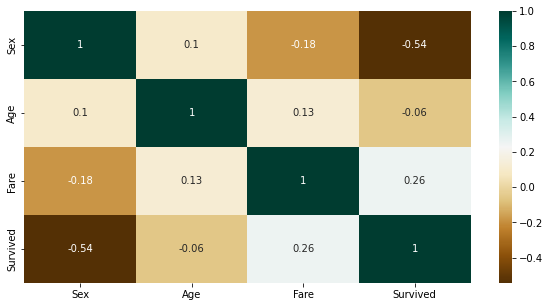

In [237]:
plt.figure(figsize=(10,5))
c=data_a.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [238]:
data_a.head()

,Sex,Age,Fare,Survived
0,1,22.0,7.2500,0
1,0,38.0,71.2833,1
2,0,26.0,7.9250,1
3,0,35.0,53.1000,1
4,1,35.0,8.0500,0


In [239]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Age       891 non-null    float64
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [240]:
data_b = pd.DataFrame()

In [241]:
print(f"Max Age  : {data_a['Age'].max()}")
print(f"Min Age  : {data_a['Age'].min()}")
print(f"Max Fare  : {data_a['Fare'].max()}")
print(f"Min Fare  : {data_a['Fare'].min()}")

Max Age  : 80.0
Min Age  : 0.42
Max Fare  : 512.3292
Min Fare  : 0.0


In [242]:
bins = [0, 18, 60, 80]
labels = ['Child', 'Adult', 'Old']
data_b['Age'] = pd.cut(data_a['Age'], bins = bins, labels=labels)
pd.DataFrame(data_b['Age'].value_counts())

,Age
Adult,693
Child,176
Old,22


In [243]:
bins = [0, 29, 149, 512.3292]
labels = ['Low', 'Medium', 'High']
data_b['Fare'] = pd.cut(data_a['Fare'], bins = bins, labels=labels)
pd.DataFrame(data_b['Fare'].value_counts())

,Fare
Low,628
Medium,219
High,29


In [244]:
data_b['Survived']=data_a['Survived']
pd.DataFrame(data_b['Survived'].value_counts())

,Survived
0,549
1,342


In [245]:
data_b['Sex']=data_a['Sex'].replace([0,1],['Female','Male'])
pd.DataFrame(data_b['Sex'].value_counts())

,Sex
Male,577
Female,314


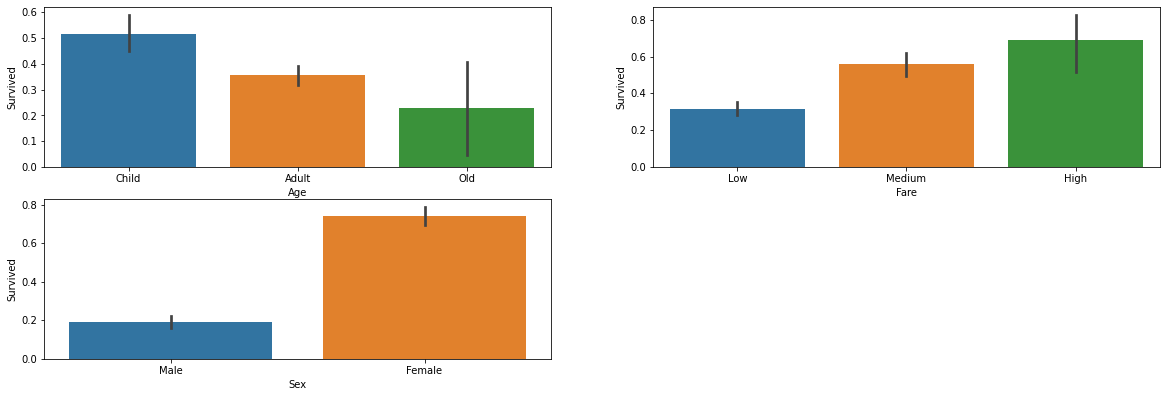

In [246]:
plt.figure(figsize=(20, 10))
plt.subplot(321)
sns.barplot(x = 'Age', y = 'Survived', data = data_b)
plt.subplot(322)
sns.barplot(x = 'Fare', y = 'Survived', data = data_b)
plt.subplot(323)
sns.barplot(x = 'Sex', y = 'Survived', data = data_b);

In [247]:
data_b

,Age,Fare,Survived,Sex
0,Adult,Low,0,Male
1,Adult,Medium,1,Female
2,Adult,Low,1,Female
3,Adult,Medium,1,Female
4,Adult,Low,0,Male
...,...,...,...,...
886,Adult,Low,0,Male
887,Adult,Medium,1,Female
888,Child,Low,0,Female
889,Adult,Medium,1,Male


In [248]:
data_c = pd.DataFrame()

In [249]:
data_c['Age']=data_b['Age'].cat.codes
data_c['Fare']=data_b['Fare'].cat.codes
data_c['Sex']=data_a['Sex']
data_c['Survived']=data_a['Survived']

In [250]:
data_c

,Age,Fare,Sex,Survived
0,1,0,1,0
1,1,1,0,1
2,1,0,0,1
3,1,1,0,1
4,1,0,1,0
...,...,...,...,...
886,1,0,1,0
887,1,1,0,1
888,0,0,0,0
889,1,1,1,1


<Axes: >

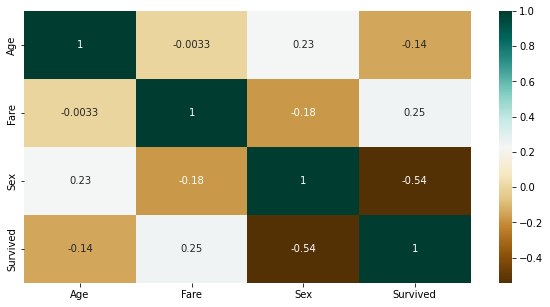

In [251]:
plt.figure(figsize=(10,5))
c=data_c.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [252]:
data_d = pd.DataFrame()
dummies = ['Fare', 'Age', 'Sex']
dummy_data = pd.get_dummies(data_b[dummies])
data_d = pd.concat([data_b, dummy_data], axis = 1)
data_d.drop(dummies, axis=1, inplace=True)
data_d['Survived']=data_a['Survived']
data_d

,Survived,Fare_Low,Fare_Medium,Fare_High,Age_Child,Age_Adult,Age_Old,Sex_Female,Sex_Male
0,0,1,0,0,0,1,0,0,1
1,1,0,1,0,0,1,0,1,0
2,1,1,0,0,0,1,0,1,0
3,1,0,1,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,0,1,0,0,1
887,1,0,1,0,0,1,0,1,0
888,0,1,0,0,1,0,0,1,0
889,1,0,1,0,0,1,0,0,1


<Axes: >

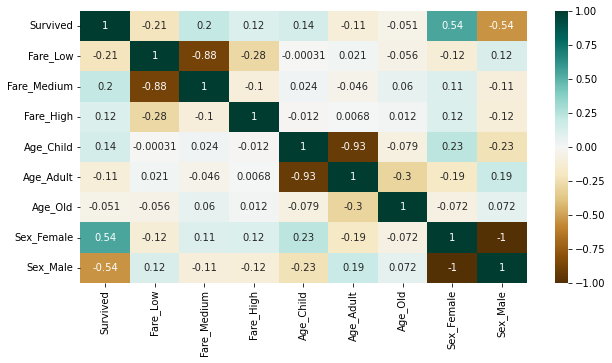

In [253]:
plt.figure(figsize=(10,5))
c=data_d.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

##  Multi - variate Logistic Regression

In [254]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [255]:
def sigmold(h):
  return 1/(1+np.exp(-h))

def b_cross_entropy(y, p_hat):
  return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))

def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [256]:
class SLogisticRegression():

  def __init__(self,thresh=0.5):
     self.thresh=thresh
     self.b=None
     self.w=None

  def fit(self, X,y, eta=1e-3,epochs=1e3, show_curve=False):
    epochs=int(epochs)
    N,D =X.shape
    # Initialize the weights and biases

    self.w =np.random.randn(D)
    self.b =np.random.randn(1)

    J=np.zeros(epochs)
    #SDG Optimization
    for epoch in range(epochs):
      p_hat=self.__forward__(X)
      J[epoch]=b_cross_entropy(y,p_hat)
      #weights and biases update rules
      self.w-=eta*(1/N)*X.T@(p_hat-y)
      self.b-=eta*(1/N)*np.sum(p_hat-y)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epchos")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    return sigmold(X@self.w +self.b)

  def predict(self,X):
    return (self.__forward__(X)>=self.thresh).astype(np.int32)
     

In [257]:

X = data_d.drop('Survived', axis = 1)
y = data_d['Survived']
y=y.to_numpy()
X=X.to_numpy()

In [258]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)

In [259]:
simplelogreg= SLogisticRegression()

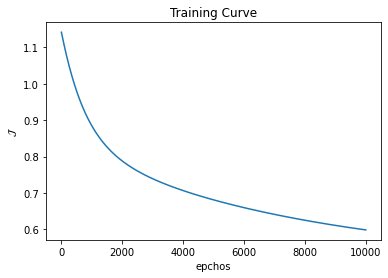

In [260]:
simplelogreg.fit(X_train,y_train,eta=1e-3,epochs=1e4, show_curve=True)

In [261]:
y_train_hat=simplelogreg.predict(X_train)
y_test_hat=simplelogreg.predict(X_test)  

In [262]:
accuracy(y_train,y_train_hat)

0.6938202247191011

In [263]:
accuracy(y_test,y_test_hat)

0.6927374301675978

## Shallow ANN or Multi-Layer Perception

In [264]:
def linear(H):
  return H

def ReLU(H):
  return H(H>0)

def sigmoid(H):
  return 1/(1+np.exp(-H))

def softmax(H):
  eH=np.exp(H)
  return eH/eH.sum(axis=1,keepdims=True)

def one_hot_code(y):
  N=len(y)
  K=len(set(y))
  Y=np.zeros((N,K))

  for i in range(N):
    Y[i,y[i]]=1

  return Y

def accuracy(y,y_hat):
  return np.mean(y==y_hat)

def cross_entropy(Y,P_hat):
  return -np.sum(Y*np.log(P_hat))

In [265]:
class Shallow_ANN():
  def fit(self,X,y,neurons =10, eta=1e-3,epochs=1e3,show_curve=False):
    epochs=int(epochs)
    Y=one_hot_code(y)
    N,D = X.shape
    K=Y.shape[1]
    # weights and Biases Initialization 

    self.W={l: np.random.randn(M[0],M[1])for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
    self.B={l: np.random.randn(M)for l,M in enumerate([neurons,K],1)}
    #define activations
    self.a={1:np.tanh, 2:sigmoid}

    J=np.zeros(epochs)

    #GradientDescent
    for epoch in range(epochs):
      self.__forward__(X)
      J[epoch]=cross_entropy(Y,self.Z[2])

      #Weights and Biases Update Rules
      #For layer 2(output)
      self.W[2]-=eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
      self.B[2]-=eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
      #For Layer 1

      self.W[1]-=eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
      self.B[1]-=eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epchos")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def __forward__(self,X):
    self.Z={0:X}

    for l in sorted(self.W.keys()):
      self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self,X):
    self.__forward__(X)
    return self.Z[2].argmax(axis=1)

In [266]:


X = data_d.drop('Survived', axis = 1)
y = data_d['Survived']
y=y.to_numpy()
X=X.to_numpy()

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=101)

In [267]:
shallowANN= Shallow_ANN()

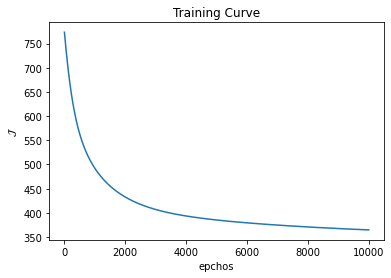

In [268]:
shallowANN.fit(X_train,y_train,eta=1e-3,epochs=1e4, show_curve=True)

In [269]:
#y_hat=shallowANN.predict(X)

y_train_hat=shallowANN.predict(X_train)
y_test_hat=shallowANN.predict(X_test) 

In [270]:
accuracy(y_train,y_train_hat)

0.7808988764044944

In [271]:
accuracy(y_test,y_test_hat)

0.7932960893854749